In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [12]:
# Extracting label from data
y_train = data_train["label"]
x_train = data_train.drop('label',axis=1)
y_test = data_test["label"]
x_test = data_test.drop('label',axis=1)

print("x_train Shape: ",x_train.shape)
print("y_train Shape: ",y_train.shape)
print("x_label Shape: ",x_test.shape)
print("y_label Shape: ",y_test.shape)

x_train Shape:  (60000, 784)
y_train Shape:  (60000,)
x_label Shape:  (10000, 784)
y_label Shape:  (10000,)


In [3]:
# Feature scaling: standardize data
sc = StandardScaler().fit(x_train)
x_std_train = sc.transform(x_train)
x_std_test = sc.transform(x_test)

In [10]:
# Check the data
x_train.isnull().any().describe()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [4]:
# importing data of MNIST using keras dataset
# x = pixel, y = label

#Converting 1D array to 2D 28x28 array using reshape , to plot and view grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Feature scaling: standardize data
sc = StandardScaler().fit(x_train)
x_std_train = sc.transform(x_train)
x_std_test = sc.transform(x_test)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

Value of y index 1 is 0


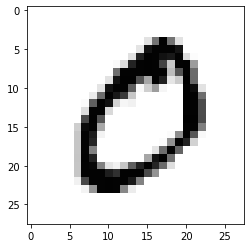

In [39]:
# check the dataset
# printing the value of y and the image
idx = 1 #index
print("Value of y index",idx,"is",y_train[idx])
plt.imshow(x_train[idx], cmap='Greys')
plt.show()

In [7]:
# check the shape of data -- it's 3D
x_train.shape

(60000, 28, 28)

In [11]:
# Reshaping the array to 4-dims before entering the Keras API
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

# Ensure the values to float so decimal points are still there after division
# and normalize the pixel data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('total of images in x_train', x_train.shape[0])
print('total of images in x_test', x_test.shape[0])

total of images in x_train 60000
total of images in x_test 10000


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Prepare a model (sequential) and adding layers accordingly data shape from .shape
train_model = Sequential()
train_model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape=input_shape))
train_model.add(MaxPooling2D(pool_size=(2,2)))
train_model.add(Flatten()) # flatten to FC layers
train_model.add(Dense(128, activation=tf.nn.relu)) # fully connected layer with relu activation
train_model.add(Dropout(0.2))
train_model.add(Dense(10,activation=tf.nn.softmax)) # fully-conected layer for output with softmax classification, 10 classes

In [24]:
train_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
train_model.fit(x=x_train, y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 738us/sample - loss: 0.0319 - accuracy: 0.9896
Epoch 2/10
60000/60000 [==============================] - 41s 684us/sample - loss: 0.0260 - accuracy: 0.9913- loss: 0.0260 - accuracy: 
Epoch 3/10
60000/60000 [==============================] - 37s 610us/sample - loss: 0.0218 - accuracy: 0.9926
Epoch 4/10
60000/60000 [==============================] - 43s 722us/sample - loss: 0.0206 - accuracy: 0.9931
Epoch 5/10
60000/60000 [==============================] - 41s 684us/sample - loss: 0.0178 - accuracy: 0.9941
Epoch 6/10
60000/60000 [==============================] - 44s 739us/sample - loss: 0.0162 - accuracy: 0.9945
Epoch 7/10
60000/60000 [==============================] - 38s 630us/sample - loss: 0.0164 - accuracy: 0.9944
Epoch 8/10
60000/60000 [==============================] - 38s 642us/sample - loss: 0.0149 - accuracy: 0.9948
Epoch 9/10
60000/60000 [==============================] - 40s 661us/sample - l

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))